In [39]:
# Importing libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#importing dataset
diamonds = pd.read_csv('./data.csv')
diamonds = pd.DataFrame(diamonds)

In [41]:
#first check of dataset
print(diamonds.shape)
display(diamonds.head())

(40455, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [42]:
#data types
print(diamonds.dtypes)
## cut color and clarity need to be transformed from categorical to ordinal

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [43]:
#Checking nulls
print(diamonds.isnull().sum())
print(diamonds.isna().sum())
##There are no nulls/nas

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [66]:
#describe function
diamonds.describe()

,carat,depth,table,price
count,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798385,61.747932,57.459085,3939.242813
std,0.474353,1.432322,2.231152,4000.344155
min,0.200000,43.000000,43.000000,326.000000
25%,0.400000,61.000000,56.000000,950.000000
50%,0.700000,61.800000,57.000000,2409.000000
75%,1.040000,62.500000,59.000000,5331.000000
max,5.010000,79.000000,79.000000,18823.000000


In [44]:
##Let's look at categorical features different values
print(diamonds["cut"].value_counts())

Ideal        16139
Premium      10377
Very Good     9101
Good          3650
Fair          1188
Name: cut, dtype: int64


In [45]:
print(diamonds["color"].value_counts())

G    8492
E    7343
F    7183
H    6230
D    5046
I    4046
J    2115
Name: color, dtype: int64


In [46]:
print(diamonds["clarity"].value_counts())

SI1     9767
VS2     9147
SI2     6909
VS1     6157
VVS2    3822
VVS1    2740
IF      1356
I1       557
Name: clarity, dtype: int64


In [47]:
##Let's look at correlation of numerical variables
corr = diamonds.corr()
print(corr)

          carat     depth     table         x         y         z     price
carat  1.000000  0.024370  0.180861  0.975010  0.944669  0.948835  0.921898
depth  0.024370  1.000000 -0.296418 -0.028645 -0.032708  0.090617 -0.014383
table  0.180861 -0.296418  1.000000  0.195254  0.181997  0.149342  0.125521
x      0.975010 -0.028645  0.195254  1.000000  0.967161  0.966188  0.884500
y      0.944669 -0.032708  0.181997  0.967161  1.000000  0.941816  0.859138
z      0.948835  0.090617  0.149342  0.966188  0.941816  1.000000  0.857643
price  0.921898 -0.014383  0.125521  0.884500  0.859138  0.857643  1.000000


AxesSubplot(0.125,0.125;0.62x0.755)


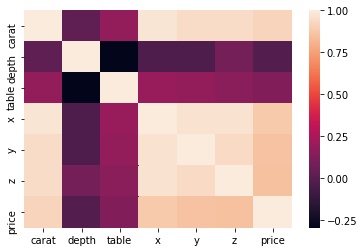

In [48]:
print(sns.heatmap(corr))
#x,y,z and carat are highly correlated. In fact carat is a product of x,y,z hence we drop x,y,z

In [49]:
diamonds.drop(['x', 'y', 'z'], axis=1, inplace=True)
display(diamonds)

,carat,cut,color,clarity,depth,table,price
0,2.26,Ideal,G,SI2,61.9,57.0,12831
1,2.43,Very Good,H,SI2,63.2,57.0,16170
2,0.80,Premium,F,SI2,61.0,57.0,2797
3,0.40,Ideal,F,I1,63.3,60.0,630
4,0.31,Ideal,G,VS2,61.6,55.0,698
...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,5315
40451,0.73,Ideal,F,VS2,62.6,56.0,2762
40452,1.26,Very Good,I,VS1,59.2,60.0,6855
40453,0.72,Ideal,G,SI2,61.4,56.0,2297


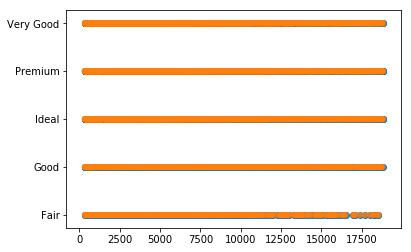

In [50]:
plt.scatter(diamonds["price"],diamonds["cut"])
plt.scatter(diamonds["price"], diamonds["cut"], alpha=0.8, edgecolors='none')

In [81]:
##Binning price column to look at data distribution of categorical columns
labels=[1,2,3,4,5,6,7,8,9,10]
diamonds['price_bin']=pd.qcut(diamonds['price'],10,labels=labels)

In [86]:
diamonds_cut=diamonds[["cut","price_bin"]]
display(diamonds_cut)

,cut,price_bin
0,Ideal,10
1,Very Good,10
2,Premium,6
3,Ideal,1
4,Ideal,2
...,...,...
40450,Premium,8
40451,Ideal,6
40452,Very Good,9
40453,Ideal,5


In [87]:
print(diamonds_cut.shape)
diamonds_cut.groupby(["cut","price_bin"]).size()

(40455, 2)


cut        price_bin
Fair       1              20
           2              31
           3              61
           4             105
           5             202
           6             219
           7             199
           8             130
           9             112
           10            109
Good       1             437
           2             260
           3             162
           4             371
           5             364
           6             406
           7             612
           8             401
           9             347
           10            290
Ideal      1            1577
           2            2027
           3            2206
           4            1885
           5            1763
           6            1553
           7            1054
           8            1228
           9            1470
           10           1376
Premium    1             734
           2             948
           3            1092
           4          

AxesSubplot(0.125,0.125;0.775x0.755)


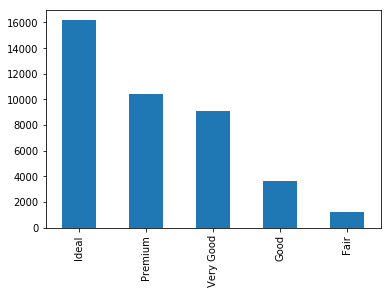

In [65]:
print(diamonds_cut['cut'].value_counts().plot(kind='bar'))